In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
df15 = pd.read_csv("../Dataset/23-02-2018.csv", low_memory = False)

In [3]:
df15 = df15.drop([0,1])

In [4]:
df15

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,22.0,0,6.0,0,1532698.0,0,11.0,0,11.0,0,...,7.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500.0,0,17.0,0,117573855.0,0,3.0,0,0.0,0,...,2.0,8.0,0.0,0.0,0.0,0.0,58786927.5,23753242.0093831,75583006.0,41990849.0
4,500.0,0,17.0,0,117573848.0,0,3.0,0,0.0,0,...,2.0,8.0,0.0,0.0,0.0,0.0,58786924.0,23753248.3733442,75583007.0,41990841.0
5,22.0,0,6.0,0,1745392.0,0,11.0,0,11.0,0,...,7.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,500.0,0,17.0,0,89483474.0,0,6.0,0,0.0,0,...,5.0,8.0,4000364.0,0.0,4000364.0,4000364.0,21370777.5,15280917.4014001,41989576.0,7200485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042864,54116.0,0,6.0,0,85992425.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,85992425.0,0.0,85992425.0,85992425.0
1042865,33914.0,0,6.0,0,132.0,0,2.0,0,0.0,0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042866,53.0,0,17.0,0,79134.0,0,1.0,0,1.0,0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042867,3389.0,0,6.0,0,10053785.0,0,11.0,0,12.0,0,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df16Aux = pd.read_csv("../Dataset/01-03-2018.csv", low_memory = False)

In [6]:
df16Aux = df16Aux.drop([0,1])

In [7]:
df16Aux

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
4,0,0,0,0,0,0,0,0,0,0,...,4,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
6,0,0,0,0,0,0,0,0,0,0,...,0,0,999909,0,999909,999909,61000000,0,61000000,61000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328179,0,0,0,0,0,0,0,1,0,0,...,0,20,0,0,0,0,0,0,0,0
328180,0,0,0,0,0,0,0,1,0,0,...,5,20,0,0,0,0,0,0,0,0
328181,0,0,0,0,0,0,1,1,0,0,...,7,20,0,0,0,0,0,0,0,0


In [8]:
listOrd = df15.columns.tolist()

In [9]:
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [10]:
df16

,Dst Port,Fwd PSH Flags,Protocol,Bwd PSH Flags,Flow Duration,Fwd URG Flags,Tot Fwd Pkts,Bwd URG Flags,Tot Bwd Pkts,FIN Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,115307855,0,5,0,0,0,...,0,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000
3,0,0,0,0,60997457,0,2,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
4,67,0,17,0,61149019,0,5,0,0,0,...,4,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725
5,0,0,0,0,60997555,0,2,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
6,0,0,0,0,61997503,0,3,0,0,0,...,0,0,999909,0,999909,999909,61000000,0,61000000,61000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328178,0,0,0,0,118494070,0,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328179,2634,0,6,0,114340,0,2,0,1,0,...,0,20,0,0,0,0,0,0,0,0
328180,3389,0,6,0,1404866,0,8,0,7,0,...,5,20,0,0,0,0,0,0,0,0
328181,3389,0,6,0,3966663,0,14,0,7,0,...,7,20,0,0,0,0,0,0,0,0


In [11]:
df16Aux = None

In [12]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)

In [13]:
output_label15 = np.array(df15["Label"])

In [14]:
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15 = out

In [15]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)

In [16]:
output_label16 = np.array(df16["Label"])

In [17]:
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [18]:
dfAE = pd.concat([df15, df16])

In [19]:
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)

In [20]:
output_labelAE = np.array(dfAE["Label"])

In [21]:
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [22]:
dfAE = None
df15 = None
df16 = None

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

In [24]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)
input_label15, output_label15 = shuffle(input_label15, output_label15)
input_label16, output_label16 = shuffle(input_label16, output_label16)

## AutoEncoder

In [25]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [26]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [27]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [28]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [29]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
30849/30849 [==============================] - 36s 1ms/step - loss: 0.0052 - accuracy: 0.8077 - val_loss: 0.0043 - val_accuracy: 0.7700
Epoch 2/10
30849/30849 [==============================] - 35s 1ms/step - loss: 0.0043 - accuracy: 0.8283 - val_loss: 0.0043 - val_accuracy: 0.8227
Epoch 3/10
30849/30849 [==============================] - 35s 1ms/step - loss: 0.0041 - accuracy: 0.8282 - val_loss: 0.0024 - val_accuracy: 0.7925
Epoch 4/10
30849/30849 [==============================] - 35s 1ms/step - loss: 0.0024 - accuracy: 0.8270 - val_loss: 0.0024 - val_accuracy: 0.7844
Epoch 5/10
30849/30849 [==============================] - 36s 1ms/step - loss: 0.0024 - accuracy: 0.8284 - val_loss: 0.0024 - val_accuracy: 0.8869
Epoch 6/10
30849/30849 [==============================] - 36s 1ms/step - loss: 0.0024 - accuracy: 0.8295 - val_loss: 0.0024 - val_accuracy: 0.8865
Epoch 7/10
30849/30849 [==============================] - 35s 1ms/step - loss: 0.0024 - accuracy: 0.8312 - val_loss: 0

In [30]:
predict = auto_encoder.predict(inp_test)

In [31]:
losses = keras.losses.mean_squared_error(out_test, predict).numpy()

In [32]:
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.002384489715078883


In [33]:
input_labelAE = None
input_label15 = encoder.predict(input_label15).reshape(len(input_label15), 18, 1)
input_label16 = encoder.predict(input_label16).reshape(len(input_label16), 18, 1)

## Classificador

In [34]:
model = keras.Sequential([
        keras.layers.Conv1D(filters = 16, input_shape = (18,1), kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Conv1D(filters = 8, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 2, activation = "softmax")
    ])

In [35]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [36]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, shuffle = True,verbose = 1)

Epoch 1/10
29331/29331 [==============================] - 41s 1ms/step - loss: 0.0199 - accuracy: 0.9994 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 2/10
29331/29331 [==============================] - 40s 1ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 3/10
29331/29331 [==============================] - 39s 1ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 4/10
29331/29331 [==============================] - 39s 1ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 5/10
29331/29331 [==============================] - 39s 1ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 6/10
29331/29331 [==============================] - 39s 1ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 7/10
29331/29331 [==============================] - 40s 1ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0

In [37]:
res = [np.argmax(resu) for resu in model.predict(input_label16)]

In [38]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [39]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[235682     96]
 [ 92390     13]]


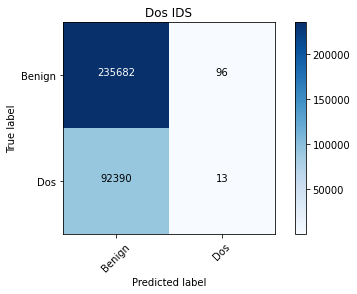

In [40]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [42]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

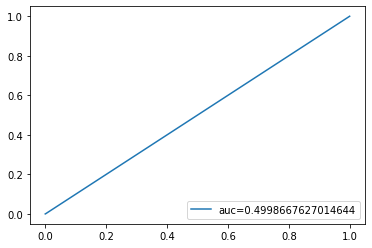

In [43]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()